# Problem Description:
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,Massachusetts. 

The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.


# Data Description:

## Demographic:

• **Sex**: male or female("M" or "F")

• **Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)


## Behavioral:

• **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")

• **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)


# Medical( history):

• **BP Meds**: whether or not the patient was on blood pressure medication(Nominal)

• **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)

• **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)

• **Diabetes**: whether or not the patient had diabetes (Nominal)
Medical(current)

• **Tot Chol**: total cholesterol level (Continuous)

• **Sys BP**: systolic blood pressure (Continuous)

• **Dia BP**: diastolic blood pressure (Continuous)

• **BMI**: Body Mass Index (Continuous)

• **Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• **Glucose**: glucose level (Continuous)
Predict variable (desired target)

## 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -dependent variable

# Mounting google drive

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


# Importing important libraries

In [2]:
# importing pandas for data reading and manipulations
# numpy for linear algebra
# seaborn and matplotlib for visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [3]:
# Importing the datacsv
df = pd.read_csv('/content/data_cardiovascular_risk.csv')

In [4]:
# Inspecting the first 5 rows of the data
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
# Inspecting the last 5 rows of the data
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [6]:
# knowing the shape of data frame
print(f"shape of our data set is {df.shape}")

shape of our data set is (3390, 17)


In [7]:
# Information about various columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#Data dictonary

• Sex: male or female("M" or "F") 

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) 

Behavioral: 

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO") 

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) 

Medical( history): 

• BP Meds: whether or not the patient was on blood pressure medication (Nominal) 

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal) 

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal) 

• Diabetes: whether or not the patient had diabetes (Nominal) 

Medical(current):

• Tot Chol: total cholesterol level (Continuous) 

• Sys BP: systolic blood pressure (Continuous) 

• Dia BP: diastolic blood pressure (Continuous) 

• BMI: Body Mass Index (Continuous) 

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.) 

• Glucose: glucose level (Continuous) 

Predict variable (desired target):

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV



In [8]:
# summary of numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.75,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0


In [9]:
# columns in our dataset
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [10]:

df.drop('id',axis=1,inplace=True)

 dropping the feature named 'id' which is not necessary for our study

In [11]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

## Looking for missing values

In [12]:
# Checking for duplicates
df.duplicated().sum()

0

There are no duplicate values are present in our dataset

In [13]:
# missing values in each feature
df.isnull().sum().sort_values(ascending=False)


glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
age                  0
sex                  0
is_smoking           0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64

In [14]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values(ascending=False)

glucose            8.967552
education          2.566372
BPMeds             1.297935
totChol            1.120944
cigsPerDay         0.648968
BMI                0.412979
heartRate          0.029499
age                0.000000
sex                0.000000
is_smoking         0.000000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
sysBP              0.000000
diaBP              0.000000
TenYearCHD         0.000000
dtype: float64

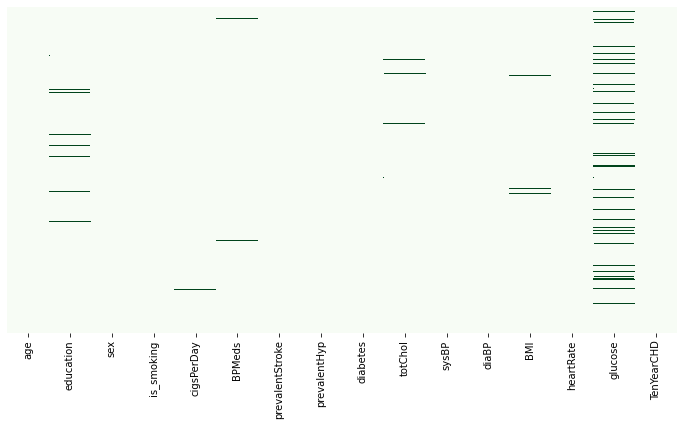

In [15]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='Greens');

**Observations:**
1. glucose has the maximum numbers of missing values almost 9%.
2. education contains almost 3 % of the missing vaues.
3. cigsPerDay,BPMeds,totChol,they all posses 1%  missing values

#Treating missing/null values and outliers

In [16]:
categorical_features = [i for i in df.columns if df[i].nunique()<=4]
numeric_features = [i for i in df.columns if i not in categorical_features]

In [17]:
categorical_features

['education',
 'sex',
 'is_smoking',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

In [18]:
numeric_features

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

### As 'education' and 'BPMeds' are categorical variables we will use mode to fill the null values

In [19]:
# Filling null values of education
df['education'].value_counts()

1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [20]:
# Understanding value counts of BP Meds
df['BPMeds'].value_counts()

0.0    3246
1.0     100
Name: BPMeds, dtype: int64

In [21]:
# Creating a function to fill null values of categorical columns with mode
def mode_fillna(df , columns):
  ''' Null values of categorical columns are filled with the mode of the column'''
  for column in columns:
    df[column] = df[column].fillna(df[column].mode()[0])

In [22]:
# Applying the function to fill null values of the column with mode
mode_fillna(df = df, columns = ['education','BPMeds'])

### It is useful to use median for filling in null values for the columns 'cigsPerDay', 'totChol', 'BMI', 'heartRate' and 'glucose'.

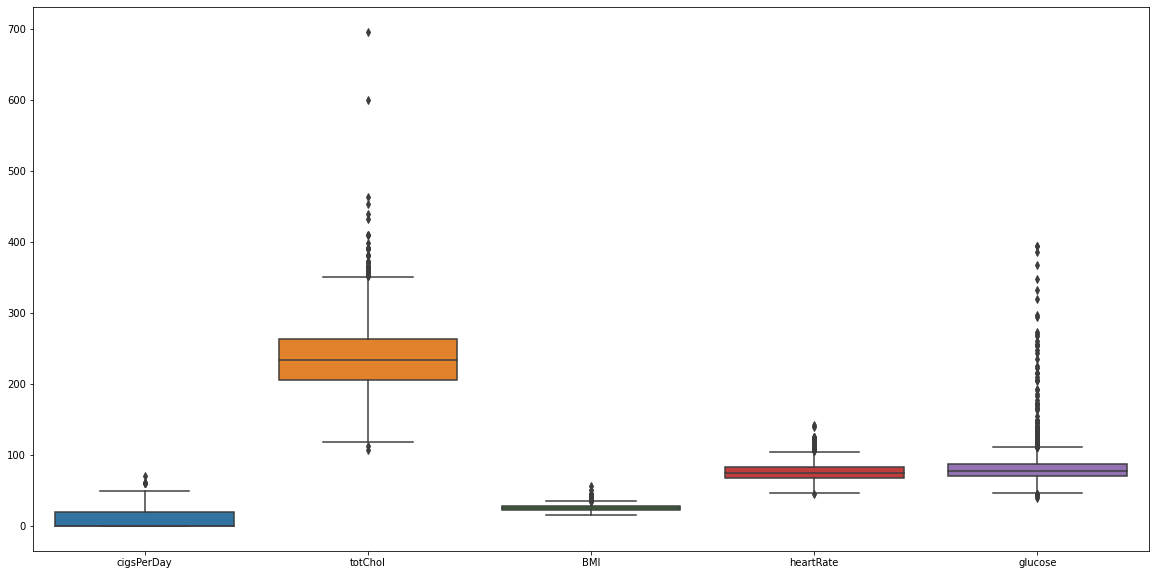

In [23]:
# Distribution of the continous columns with null values
plt.figure(figsize=(20,10))
sns.boxplot(data=df[['cigsPerDay','totChol','BMI','heartRate','glucose']])

In [24]:
# Creating a function to fill null values of continous columns with median
def median_fillna(df, columns):
  ''' Null values of continous columns are filled with the median of the column '''
  for column in columns:
    df[column] = df[column].fillna(df[column].median())

In [25]:
# Applying the function to fill null values of continous columns with the median
median_fillna(df = df, columns = ['cigsPerDay','totChol','BMI','heartRate'])

In [26]:
#KNN to find the missing values for glucose

from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# Defining scaler and imputer objects
scaler = StandardScaler()
imputer = KNNImputer()

# Imputing missing values with KNN if any
df['glucose'] = imputer.fit_transform((df['glucose'].values.reshape(-1,1)))

In [27]:
# Checking for null values after treating the null values
df.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

##Treating outliers

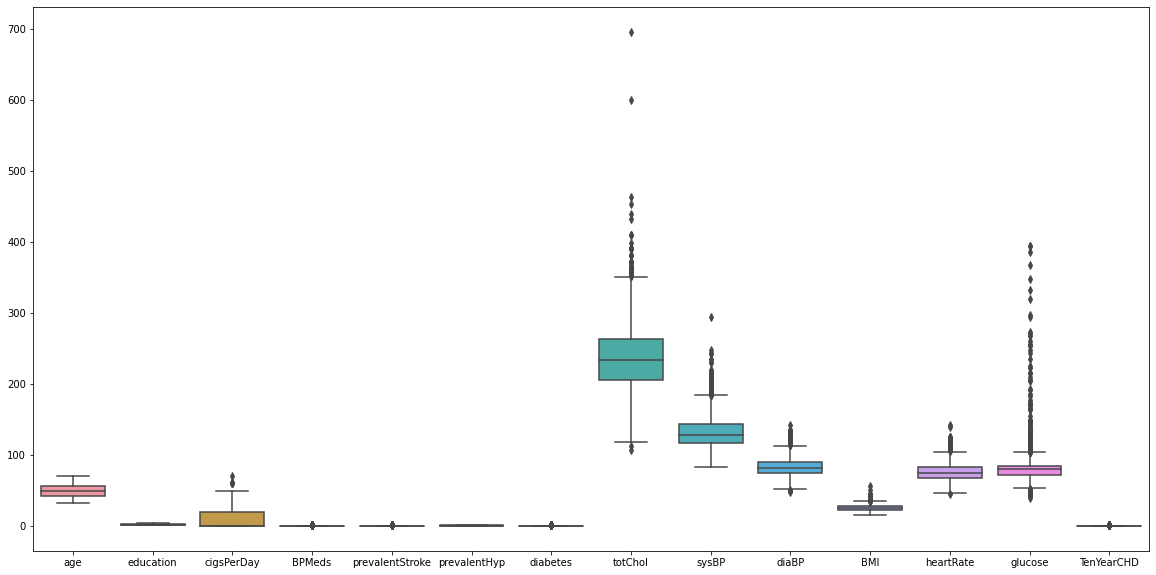

In [28]:
#Plotting the box plot for checking the outliers
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=df)
plt.show()

In [29]:
# Function which returns columns with risk of outlier removal
def outlier_cal(columns):
  ''' Returns a dataframe showing risk of removal of outliers'''
  outlier_df = pd.DataFrame(columns=['Column', 'Upper Limit', 'Lower Limit', 'Upper Removal', 'Lower Removal', '% of Risk'])
  
  for column in columns:
    q3 = df[column].quantile(0.75)
    q1 = df[column].quantile(0.25)
    iqr = q3 - q1
    ul = q3 + (1.5* iqr)
    ll = q1 - (1.5* iqr)
  
    upper_removal = dict(df[df[column] > ul]['TenYearCHD'].value_counts())
    lower_removal = dict(df[df[column] < ll]['TenYearCHD'].value_counts())

    input_dict = {'Column' : column,
                  'Upper Limit' : ul,
                  'Lower Limit' : ll,
                  'Upper Removal' : upper_removal,
                  'Lower Removal' : lower_removal,
                  '% of Risk' : upper_removal[1]*100/len(df[df[column] > ul])}

    outlier_df = outlier_df.append(input_dict, ignore_index = True)

  return outlier_df

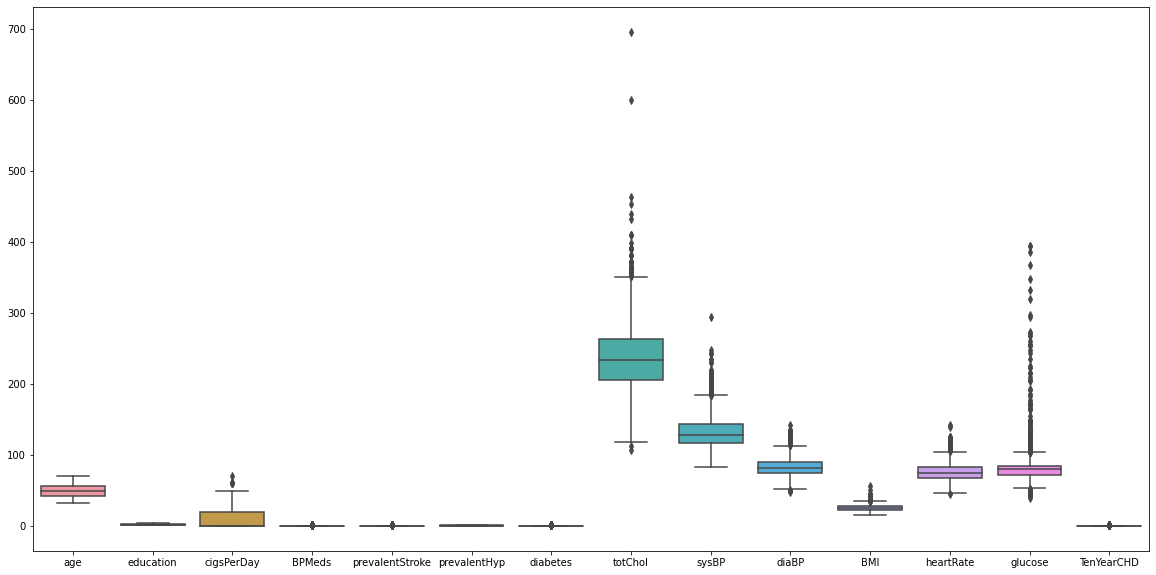

In [30]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=df)
plt.show()

In [31]:
# Applying the function created
outlier_cal(['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose'])

,Column,Upper Limit,Lower Limit,Upper Removal,Lower Removal,% of Risk
0,cigsPerDay,50.00000,-30.00000,"{0: 7, 1: 2}",{},22.222222
1,totChol,351.00000,119.00000,"{0: 30, 1: 11}","{0: 1, 1: 1}",26.829268
2,sysBP,184.50000,76.50000,"{0: 64, 1: 41}",{},39.047619
3,diaBP,113.25000,51.25000,"{0: 32, 1: 23}","{1: 2, 0: 1}",41.818182
4,BMI,35.44875,15.57875,"{0: 62, 1: 17}",{},21.518987
5,heartRate,105.50000,45.50000,"{0: 50, 1: 13}",{0: 1},20.634921
6,glucose,104.50000,52.50000,"{0: 143, 1: 57}","{0: 13, 1: 1}",28.500000


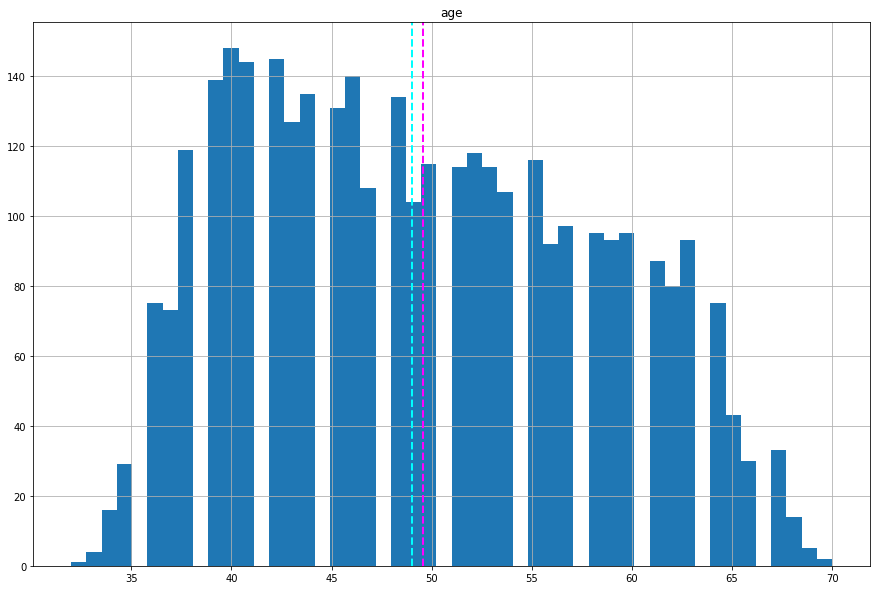

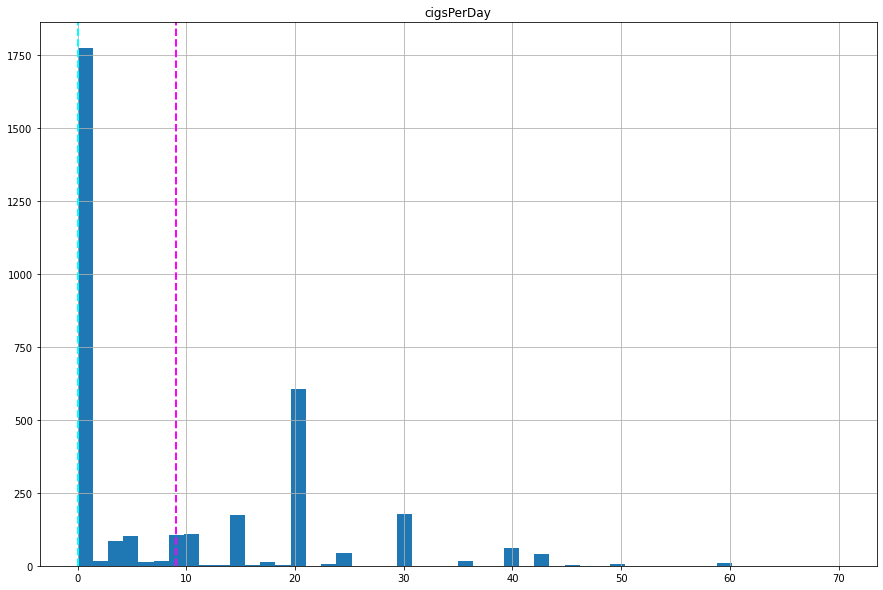

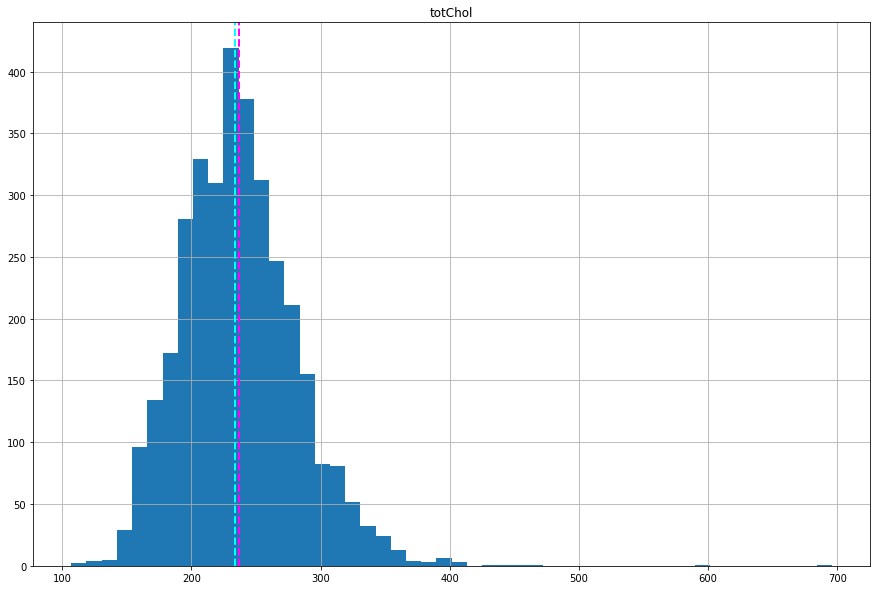

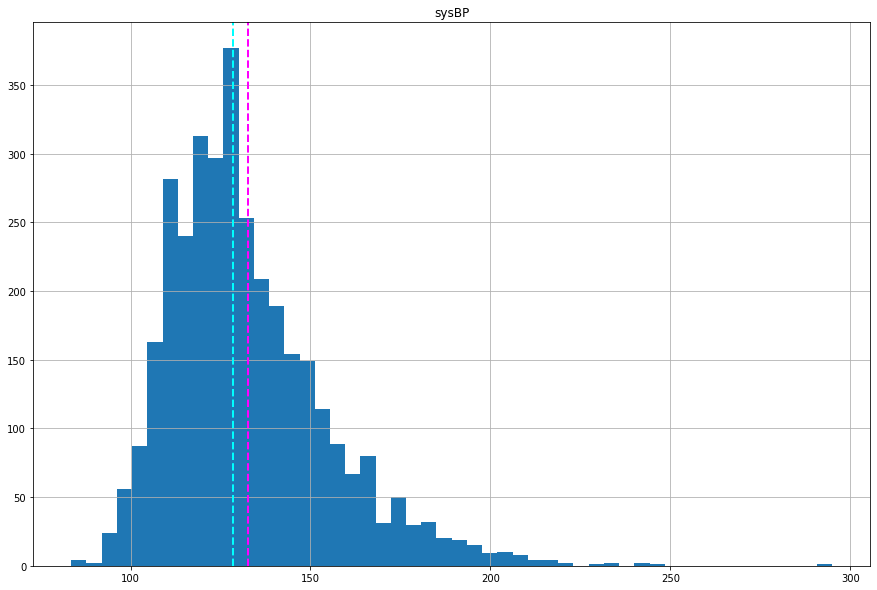

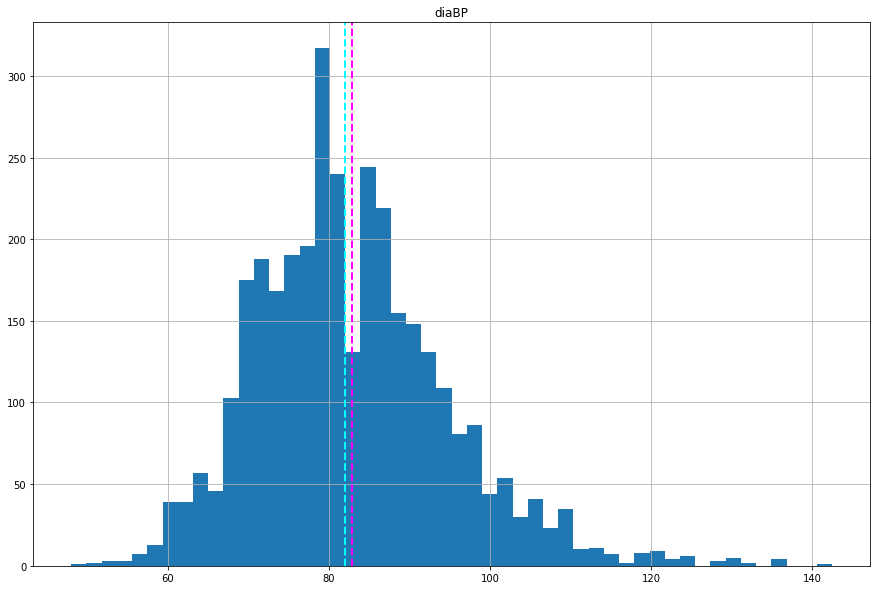

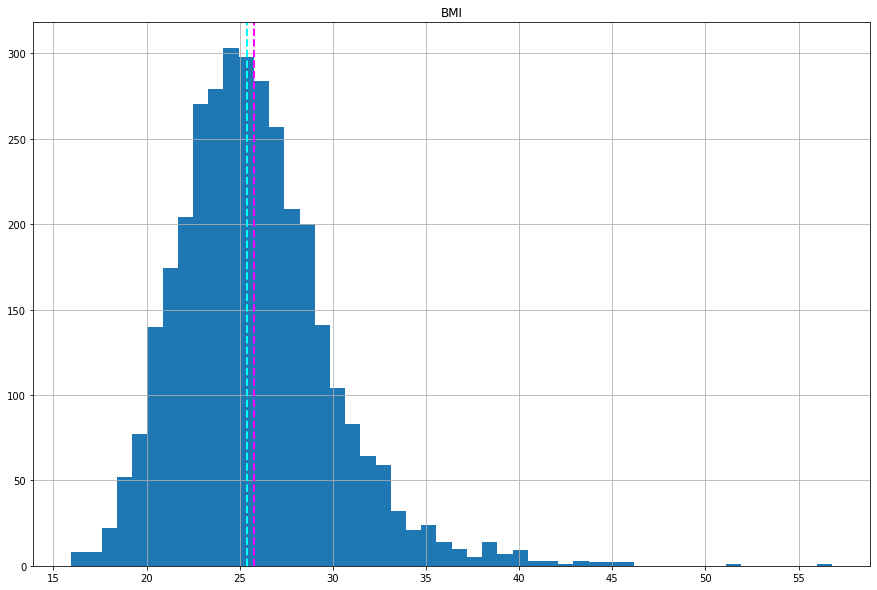

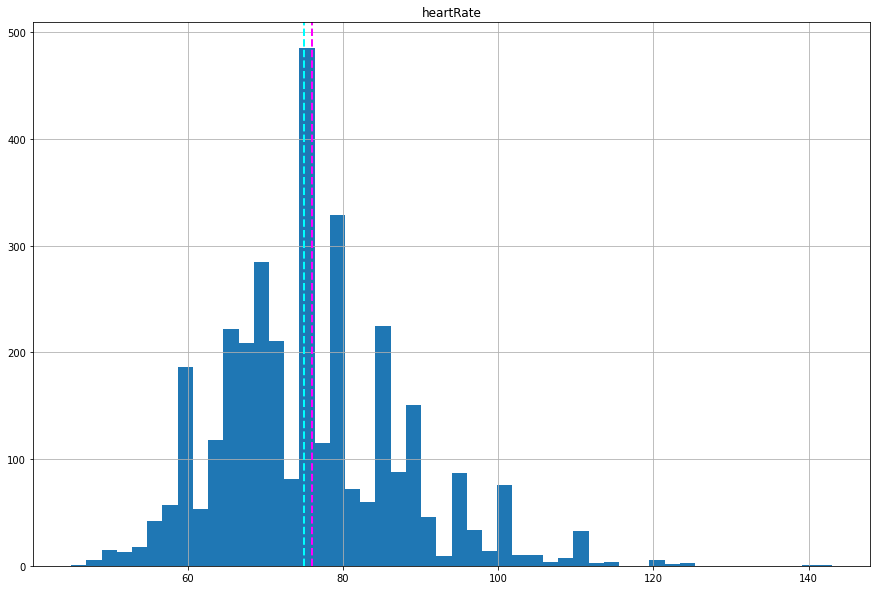

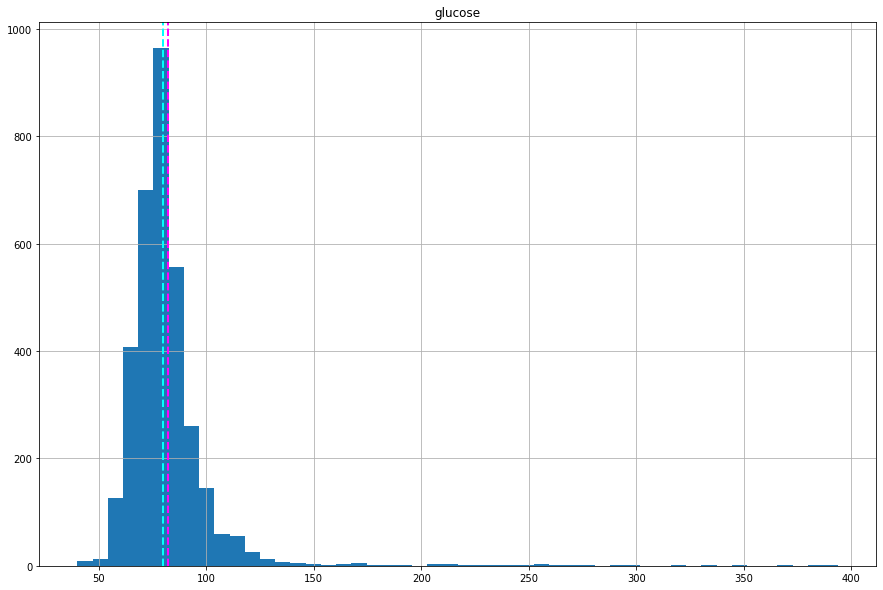

In [32]:
# plot a bar plot for each numerical feature

for col in numeric_features:
    fig = plt.figure(figsize=(15, 10))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)     
    ax.set_title(col)
plt.show()

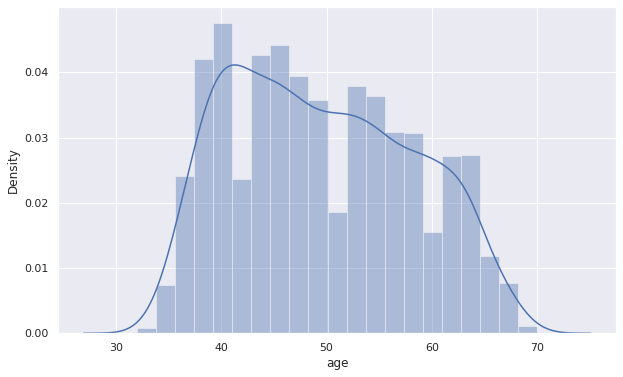

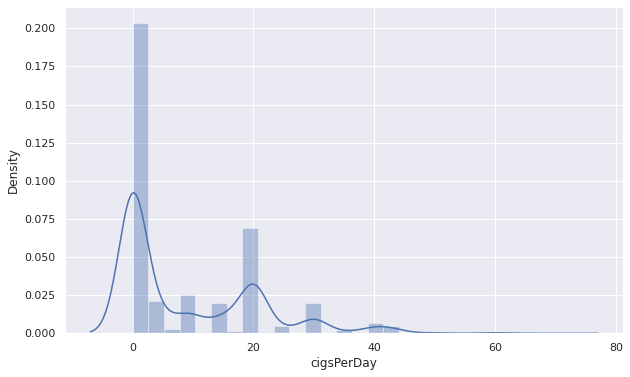

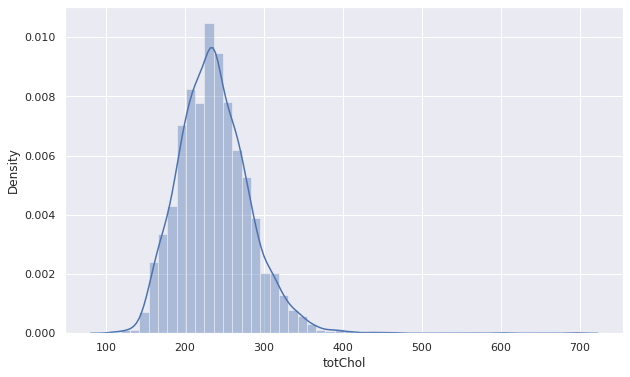

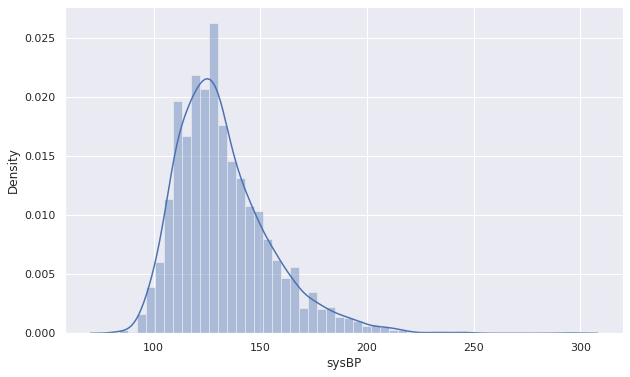

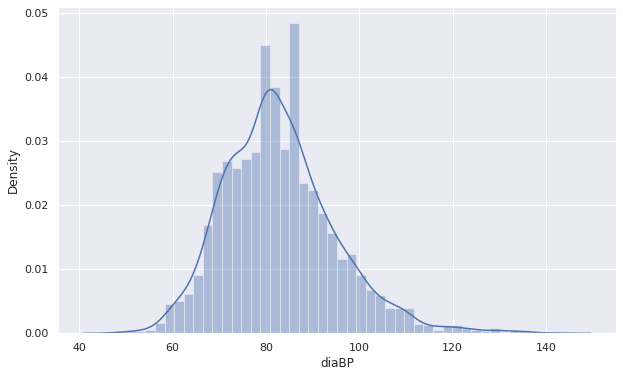

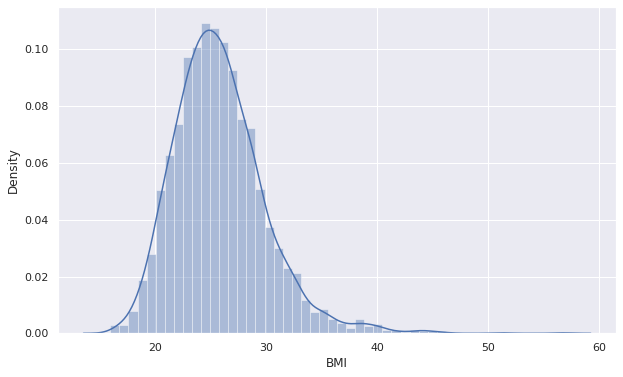

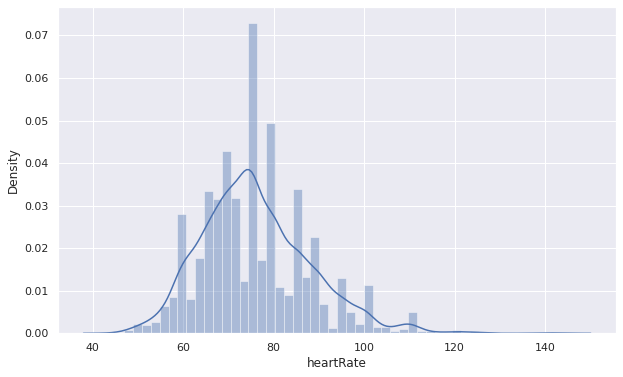

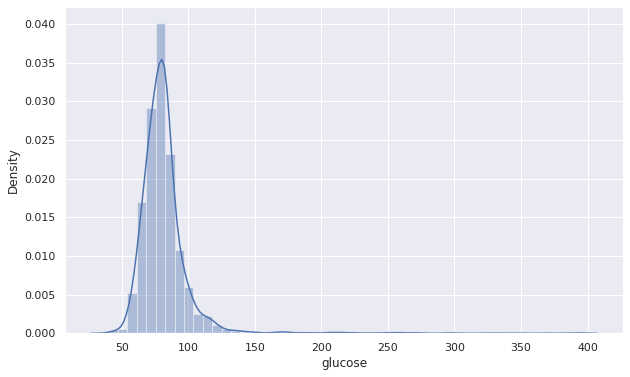

In [33]:
sns.set(rc = {'figure.figsize':(15,8)})
for i in numeric_features:
  if i != 'id':
    plt.figure(figsize=(10,6))
    sns.distplot(df[i])

In [34]:
# Creating a function to plot countplots for categorical columns
def count_plotting(columns):
  ''' Returns subplots of countplot graphs using seaborn '''
  sns.set_style('whitegrid')
  fig, axes = plt.subplots(len(columns) , figsize=(10,50))
  
  plot_list = zip(list(range(0,len(columns)+1)), columns)

  for i , column in plot_list:
    sns.countplot(ax = axes[i], data = df, x = column)

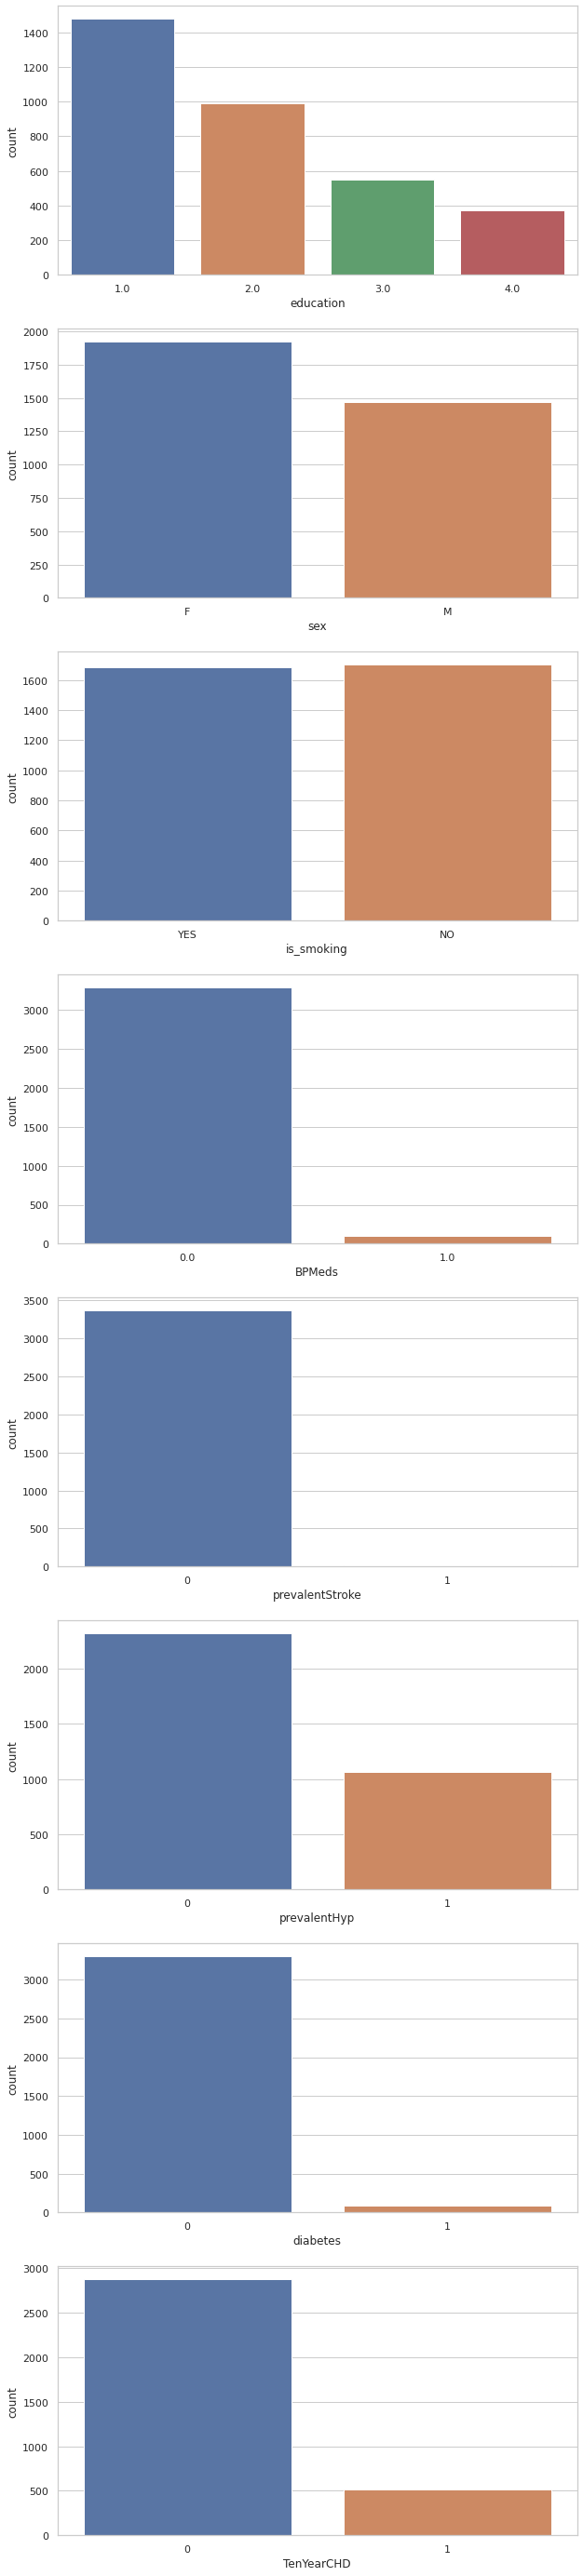

In [35]:
 # Creating countplots using above function,,not considering the target variable we will handle it separately
count_plotting(categorical_features)

### Inferences:
* In our dataset, we divide people into four levels based on their education level, and level 1 people constitute the largest proportion, while level four people represent a smaller proportion.
* We observed that the number of females in our dataset was higher than the number of males in our dataset.
* Number of smokers and non-smokers are equal.
* Our dataset contains very few people who take blood pressure medications.

* There were only a few people who had previously suffered a stroke.





* Hypertensive patients constituted a greater number of patients than those without hypertension.

* The number of people with diabates was relatively low.

* In our dataset, fewer people are at risk of cardiac arrest in the next ten years.

Bivariate Analysis

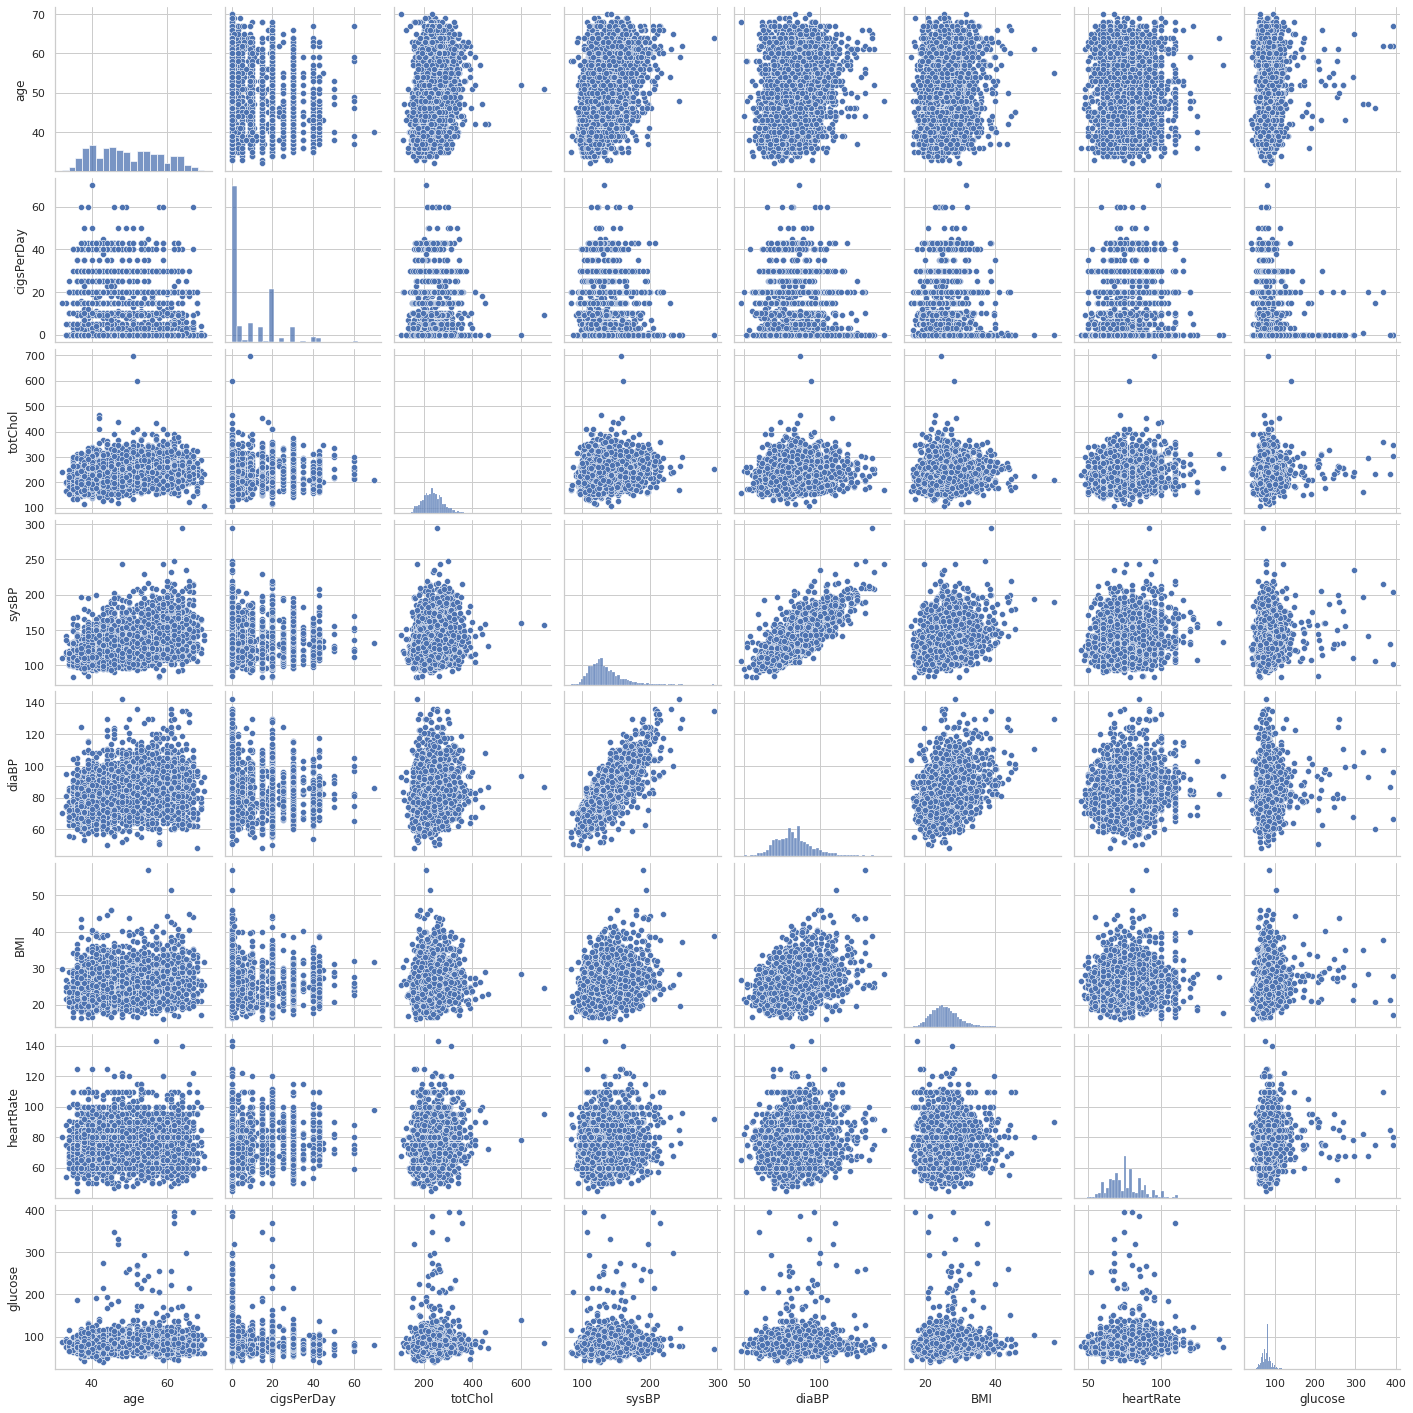

In [36]:
# Bivariate analysis using pairplot
sns.pairplot(df[numeric_features])

## **2. Bivariate Analysis:**
In bivariate analysis, the data are analyzed in two ways. The purpose of this statistical analysis is to determine the relationship between two value sets. The variables that are involved are X and Y.

####**1. Our findings can help us determine which gender has a higher risk of coronary heart disease.**

In [37]:
#Creating the dataframe 
df_gender=df.groupby('sex')[['TenYearCHD']].count().sort_values(by='TenYearCHD',ascending=False).reset_index().head()
df_gender

,sex,TenYearCHD
0,F,1923
1,M,1467


(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
        2250.]), <a list of 10 Text major ticklabel objects>)

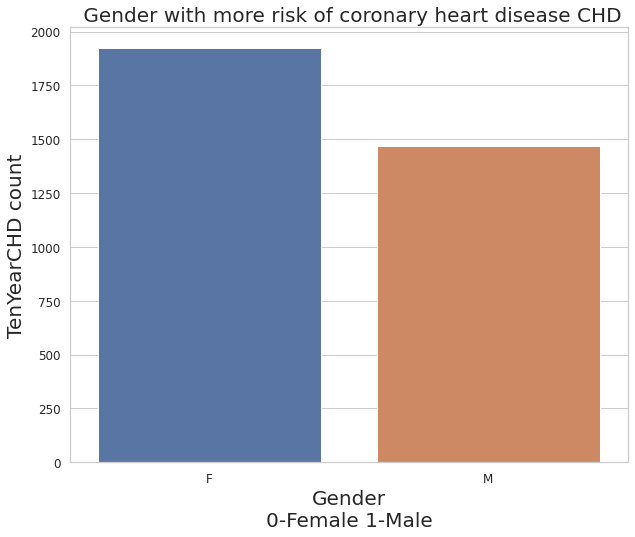

In [38]:
# plotting to answer the above question:
x=df_gender['sex']
y=df_gender['TenYearCHD']
plt.figure(figsize=(10,8), facecolor='w')
sns.barplot(x,y)
plt.title(" Gender with more risk of coronary heart disease CHD", size=20)
plt.xlabel("Gender\n0-Female 1-Male",size=20)
plt.ylabel("TenYearCHD count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)


####**2. Smokers are more likely to be in the following age groups**:

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text major ticklabel objects>)

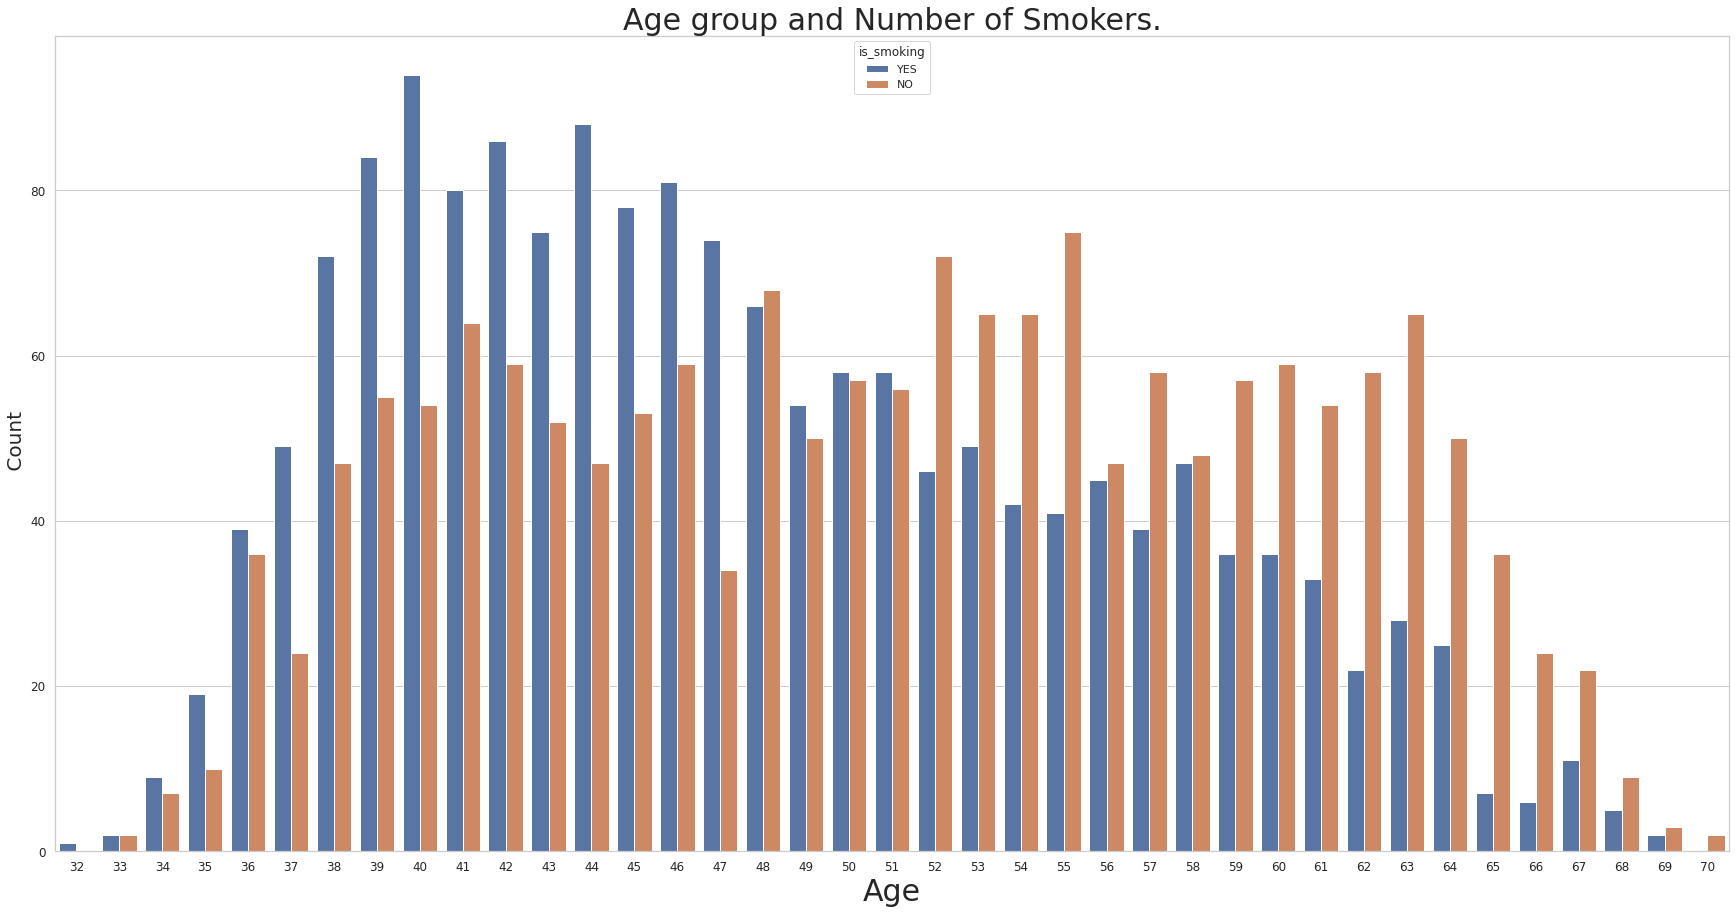

In [39]:
#Distribution of current smokers with respect to age
plt.figure(figsize=(30,15), facecolor='w')
sns.countplot(x="age",data=df,hue="is_smoking")
plt.title("Age group and Number of Smokers.", size=30)
plt.xlabel("Age", size=30)
plt.ylabel(" Count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

### **3. Coronary heart disease risk associated with smoking one cigarette per day**

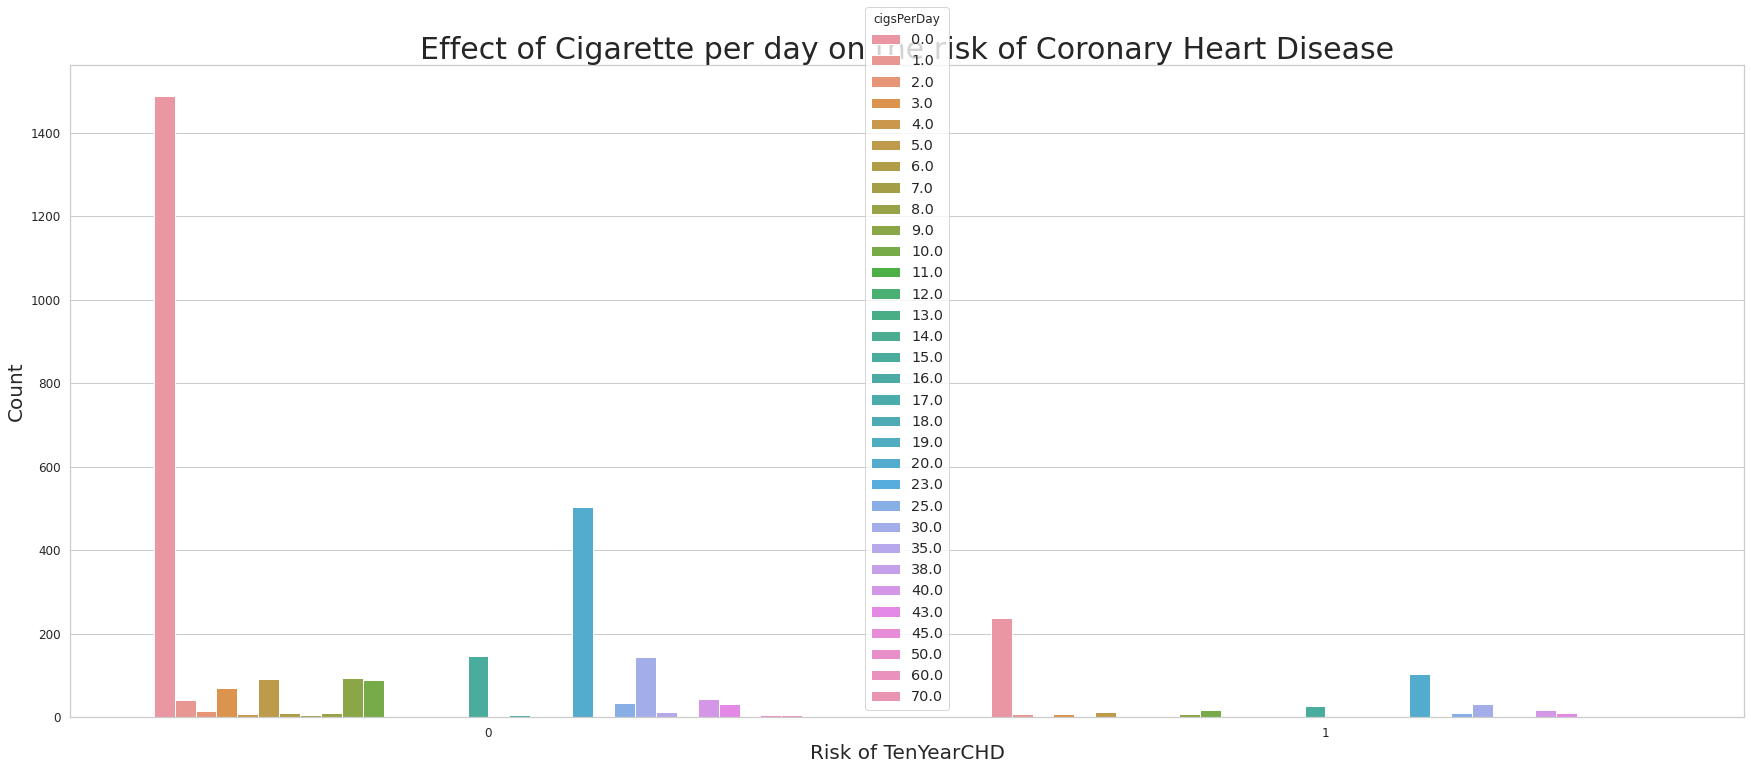

In [40]:
# Visualising the effect of Cigarette per day on the risk of Coronary Heart Disease
plt.figure(figsize=(30,12), facecolor='w')
sns.countplot(x="TenYearCHD",data=df,hue="cigsPerDay")
plt.legend(title='cigsPerDay', fontsize='large')
plt.title("Effect of Cigarette per day on the risk of Coronary Heart Disease", size=30)
plt.xlabel("Risk of TenYearCHD", size=20)
plt.ylabel("Count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

### **4. Risk of coronary heart disease associated with sysBP**

In [41]:
#Creating the dataframe
df_sys_bp= df.groupby("TenYearCHD")[['sysBP']].mean().sort_values(by='TenYearCHD',ascending=False).reset_index().head()
df_sys_bp

,TenYearCHD,sysBP
0,1,143.854207
1,0,130.603856


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text major ticklabel objects>)

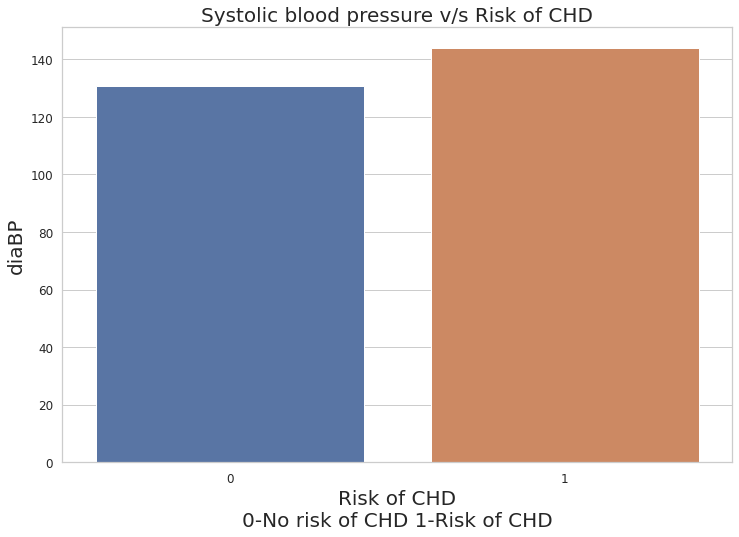

In [42]:
# ploting for the sysbp and how it affects the risk of coronary heart disease
plt.figure(figsize=(12,8), facecolor='w')

sns.barplot(x=df_sys_bp["TenYearCHD"], y=df_sys_bp["sysBP"])
plt.title("Systolic blood pressure v/s Risk of CHD", size=20)
plt.xlabel("Risk of CHD\n0-No risk of CHD 1-Risk of CHD", size=20)
plt.ylabel("diaBP", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

### **5. Cardiovascular disease risk associated with diaBP**

In [43]:
#Creating the dataframe
df_diaBP= df.groupby("TenYearCHD")[['diaBP']].mean().sort_values(by='TenYearCHD',ascending=False).reset_index().head()
df_diaBP

,TenYearCHD,diaBP
0,1,86.763209
1,0,82.194338


(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text major ticklabel objects>)

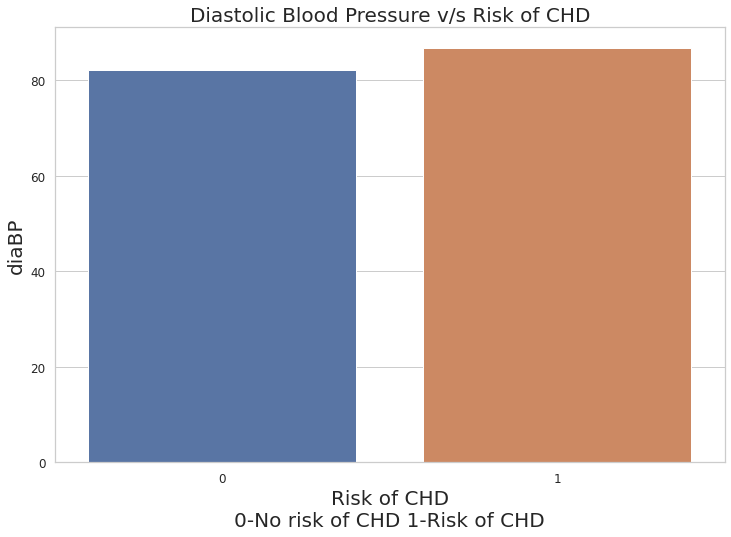

In [44]:
# ploting for the diabp how it affects the risk of coronary heart disease
plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=df_diaBP["TenYearCHD"], y=df_diaBP["diaBP"])
plt.title("Diastolic Blood Pressure v/s Risk of CHD", size=20)
plt.xlabel("Risk of CHD\n0-No risk of CHD 1-Risk of CHD", size=20)
plt.ylabel("diaBP", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

### **From the above Bi-Variate analysis,we can draw the following observations:**

1.In the middle age group, the number of current smokers starts to rise
2.Coronary heart disease is slightly more common in females
3.A very small number of people were smoking at the age of 32, or perhaps none at all.
4.There is a reduction in CHD risk with fewer cigarettes per day
5.It is normal for systolic blood pressure to be less than 120. As systolic blood pressure rises above this range, the risk of coronary heart disease increases.
6.Highercholesterol levels are associated with higher chances of heart disease.
7.A diastolic blood pressure reading of 80mm Hg is considered normal,Coronary heart disease increases with higher diastolic blood pressure values;

#Multivariate Analysis

In [45]:
corr_matrix = df.corr().T
corr_matrix

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
age,1.000000,-0.170614,-0.191465,0.122114,0.059038,0.308826,0.107875,0.271961,0.404845,0.221896,0.137478,-0.002636,0.111241,0.224927
education,-0.170614,1.000000,0.014078,-0.019880,-0.031820,-0.081925,-0.051895,-0.021221,-0.132202,-0.060774,-0.135783,-0.039395,-0.038000,-0.051388
cigsPerDay,-0.191465,0.014078,1.000000,-0.035727,-0.041576,-0.078003,-0.048114,-0.025346,-0.100348,-0.068320,-0.099830,0.066229,-0.066359,0.068020
BPMeds,0.122114,-0.019880,-0.035727,1.000000,0.116183,0.256892,0.070932,0.080918,0.260384,0.198780,0.087648,0.018107,0.061444,0.087349
prevalentStroke,0.059038,-0.031820,-0.041576,0.116183,1.000000,0.071652,0.010115,-0.010769,0.057568,0.047235,0.017032,-0.019183,0.023061,0.068627
prevalentHyp,0.308826,-0.081925,-0.078003,0.256892,0.071652,1.000000,0.082565,0.158693,0.699285,0.612897,0.299615,0.150731,0.082747,0.166544
diabetes,0.107875,-0.051895,-0.048114,0.070932,0.010115,0.082565,1.000000,0.059194,0.124011,0.061165,0.087793,0.039746,0.608937,0.103681
totChol,0.271961,-0.021221,-0.025346,0.080918,-0.010769,0.158693,0.059194,1.000000,0.197848,0.153825,0.113452,0.086955,0.060227,0.093605
sysBP,0.404845,-0.132202,-0.100348,0.260384,0.057568,0.699285,0.124011,0.197848,1.000000,0.781908,0.331730,0.178135,0.137020,0.212703
diaBP,0.221896,-0.060774,-0.068320,0.198780,0.047235,0.612897,0.061165,0.153825,0.781908,1.000000,0.379684,0.174908,0.068489,0.135979


(14.5, -0.5)

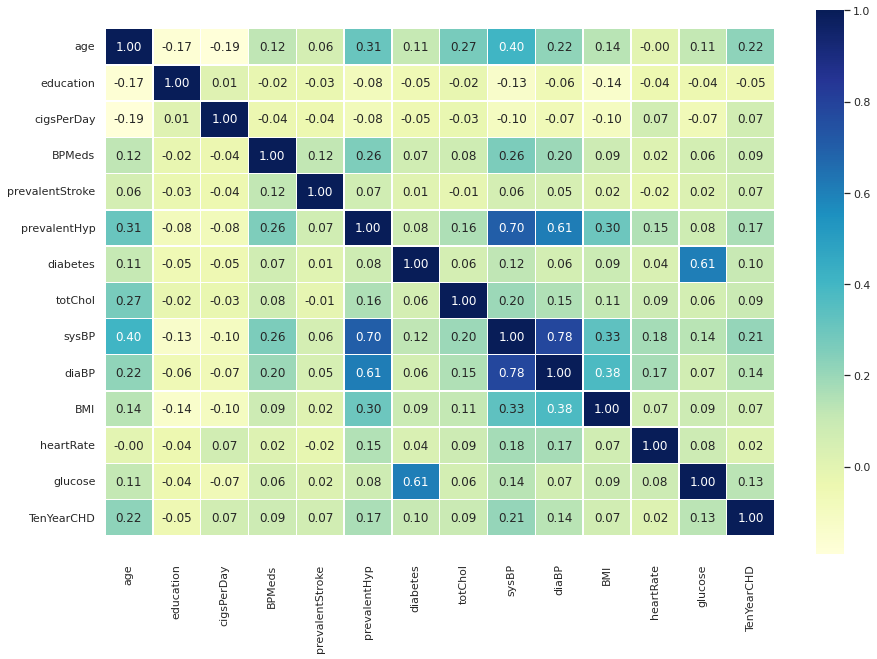

In [46]:
# Let's make our correlation matrix a little prettier
#visualization of the correlation in the heatmap
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### The heatmap illustrates that:

* Systolic blood pressure is highly correlated with diastolic blood pressure.

* BMI and hypertension are influenced by both Systolic and Diastolic blood pressure.

* There is a positive correlation between systolic blood pressure and age.

* Variables such as age, hypertension, systolic BP, diastolic BP, and glucose mostly determine heart disease risk.

* Except for education, all variables show a positive correlation with the dependent variable.

##3. Data Transformation

### I have found that heart diseases are heavily affected by pulse pressure, which is the difference between systolic and diastolic blood pressure. As a result, we can add PP (pulse pressure) which will have the systolic as well as diastolic blood pressure values in the same column.

In [47]:
# Adding pulse pressure as a column
df['pulsePressure'] = df['sysBP'] - df['diaBP']

### As we consider the difference in systolic and diastolic BP to calculate pulse pressure, we can now drop the systolic and diastolic BP columns

In [48]:
# Dropping the systolic and diastolic BP columns
df.drop(['sysBP','diaBP'], axis = 1, inplace = True)

### In addition, we can drop the 'is_smoking' column if cigarettes per day exceed 0, in which case is_smoking is 1 (YES). As a result, they both convey the same meaning


In [49]:
# Dropping the 'is_smoking' column
df.drop('is_smoking', axis = 1, inplace = True)

### Sex is a categorical column. In this case, it was possible to create a dummy variable out of it.



In [50]:
# Creating dummy variables for 'sex'
df = pd.get_dummies(df , columns = ['sex'])

In [51]:
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

### The classes are clearly imbalanced. Therefore, we will use SMOTE to oversample classes that are relatively few in number.


In [52]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [53]:
# Creating an instance for SMOTE
smote = SMOTE()

In [54]:
# Dividing data into independent (X) and dependent (y) variables
independent_variables = ['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'BMI', 'heartRate', 'glucose', 'pulsePressure', 'sex_F', 'sex_M']
dependent_variable = 'TenYearCHD'
X = df.loc[:, independent_variables]
y = df[dependent_variable]

In [55]:
# The rows and columns of X and y
print(f'X has {X.shape[0]} rows and {X.shape[1]} columns')
print(f'y has {y.shape[0]} rows')

X has 3390 rows and 14 columns
y has 3390 rows


In [56]:
# Using SMOTE to oversample
X,y = smote.fit_resample(X,y)

In [57]:
# Counts of each classes after oversampling
print(list(y).count(1))
print(list(y).count(0))

2879
2879


In [58]:
# Rows in the dataset after oversampling
print(f'Number of rows in X is {len(X)}')
print(f'Number of rows in y is {len(y)}')

Number of rows in X is 5758
Number of rows in y is 5758


### There will be no bias in predictions since both classes are of equal size.

### The numbers in the data have different ranges, hence, we will scale the data using the Min Max Scaler

In [59]:
# Importing Min Max Scaler
from sklearn.preprocessing import MinMaxScaler

In [60]:
# Creating an instance for Min Max Scaler
scaler = MinMaxScaler()

In [61]:
# Scaling the independent variables
X = scaler.fit_transform(X)

##4. Model Building and Evaluation

### During this project, 5 models will be tested and evaluated

### 1. Logistic Regression
### 2. Random Forest
### 3. XGB Classifier
### 4. KNN
### 5. SVM

In [62]:
# Importing packages to split data into train and test
from sklearn.model_selection import train_test_split

In [63]:
# Importing libraries for modelling and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [64]:
# Creating a dictionary for models
models = {'Logistic Regression' : LogisticRegression(),
              'Random Forest' : RandomForestClassifier(),
              'XGB Classifier' : XGBClassifier(),
              'KNN' : KNeighborsClassifier(),
              'SVC' : SVC(probability=True)}

In [65]:
# Train Test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [68]:
# Creating a function for model building
def model_build(X_train, y_train, X_test, y_test, model_dict):
  ''' Returns a dataframe with model name and accuracy scores, train confusion matrix, test confusion matrix and the values 
  for the roc curve '''
  
  # Creating a dataframe
  model_df = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC'])
  
  # Creating necessary dictionaries
  train_confusion_matrix = {}  
  test_confusion_matrix = {}  
  curve = {}
  
  
  # Model building
  for n, m in model_dict.items():
    model = m
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    test_probs = model.predict_proba(X_test)
    test_probs = test_probs[:,1]

    # Evaluation
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    train_precision = precision_score(y_train, train_preds)
    test_precision = precision_score(y_test, test_preds)
    train_recall = recall_score(y_train, train_preds)
    test_recall = recall_score(y_test, test_preds)
    train_roc_auc = roc_auc_score(y_train, train_preds)
    test_roc_auc = roc_auc_score(y_test, test_preds)

    # Updating the dataframe for each iteration
    model_df = model_df.append({'Model': n,
                               'Train Accuracy' : train_accuracy,
                               'Test Accuracy': test_accuracy,
                               'Train Precision' : train_precision,
                               'Test Precision' : test_precision,
                               'Train Recall' : train_recall,
                               'Test Recall' : test_recall,
                               'Train ROC AUC' : train_roc_auc,
                               'Test ROC AUC' : test_roc_auc}, ignore_index = True)
    
    # Updating the dictionary for each iteration
    train_confusion_matrix[n] = confusion_matrix(y_train, train_preds)
    test_confusion_matrix[n] = confusion_matrix(y_test, test_preds) 
    # ROC Curve values
    fpr, tpr, _ = roc_curve(y_test, test_probs)
    curve[n] = (fpr,tpr)

    

  return model_df, train_confusion_matrix, test_confusion_matrix, curve

In [69]:
# Using the model function to understand the scores of different models
model_table, train_cm, test_cm, curve= model_build(X_train, y_train, X_test, y_test, models)

In [70]:
# Models and their scores
model_table

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC AUC,Test ROC AUC
0,Logistic Regression,0.743161,0.739583,0.786787,0.746063,0.674968,0.689091,0.743940,0.737403
1,Random Forest,1.000000,0.914062,1.000000,0.926276,1.000000,0.890909,1.000000,0.913063
2,XGB Classifier,0.881025,0.861979,0.947263,0.904762,0.809790,0.794545,0.881838,0.859067
3,KNN,0.886018,0.809028,0.874896,0.789474,0.903821,0.818182,0.885815,0.809423
4,SVC,0.765523,0.774306,0.840327,0.811159,0.662087,0.687273,0.766704,0.770547


In [71]:
# Train confusion matrix
for name, matrix in train_cm.items():
  print(f'Model : {name}')
  print(matrix)
  print('**'*10)


Model : Logistic Regression
[[1851  426]
 [ 757 1572]]
********************
Model : Random Forest
[[2277    0]
 [   0 2329]]
********************
Model : XGB Classifier
[[2172  105]
 [ 443 1886]]
********************
Model : KNN
[[1976  301]
 [ 224 2105]]
********************
Model : SVC
[[1984  293]
 [ 787 1542]]
********************


In [72]:
# Test confusion matrix
for name, matrix in test_cm.items():
  print(f'Model : {name}')
  print(matrix)
  print('**'*10)

Model : Logistic Regression
[[473 129]
 [171 379]]
********************
Model : Random Forest
[[563  39]
 [ 60 490]]
********************
Model : XGB Classifier
[[556  46]
 [113 437]]
********************
Model : KNN
[[482 120]
 [100 450]]
********************
Model : SVC
[[514  88]
 [172 378]]
********************


Text(0.5, 1.0, 'ROC CURVE')

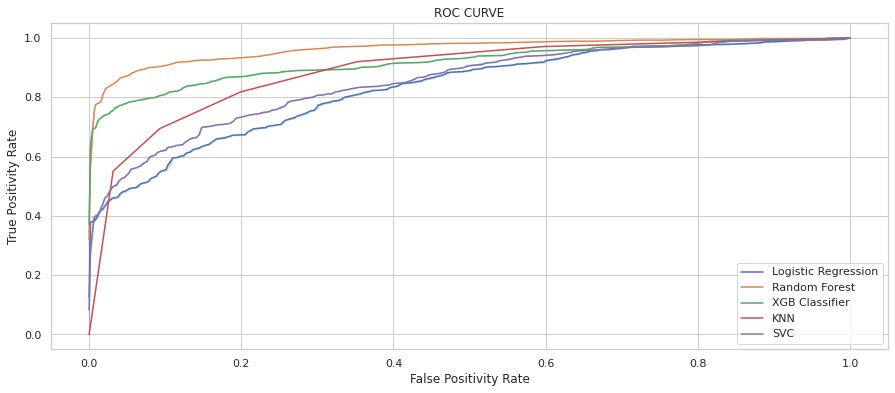

In [73]:
# Plotting ROC Curve for all the models
plt.figure(figsize=(15,6))
for name, value in curve.items():
  sns.lineplot(x = value[0], y = value[1], label = name)
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title('ROC CURVE')

### XGB Classifier and Random Forest are the two best models from the model building section. As a comparison of these two models, Random Forest is overfitting to some extent. Hyperparameter tuning will be conducted on XGB Classifier since it is the second-best performer.



In [74]:
# Importing libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [75]:
# Creating a function for hyperparameter tuning
def grid_fitting(name, hyperparams, estim):
  '''Returns a dataframe with scores of the model post hyperparameter tuning along with best model and confusion matrix for train and test '''
  
  grid_df = pd.DataFrame(columns = ['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC'])

  grid = GridSearchCV(estimator= estim, param_grid = hyperparams, cv = 5, scoring = 'recall')

  grid.fit(X_train,y_train)

  best_model = grid.best_estimator_

  train_grid = best_model.predict(X_train)
  test_grid = best_model.predict(X_test)

  grid_train_accuracy = accuracy_score(y_train, train_grid)
  grid_test_accuracy = accuracy_score(y_test, test_grid)
  grid_train_precision = precision_score(y_train, train_grid)
  grid_test_precision = precision_score(y_test, test_grid)
  grid_train_recall = recall_score(y_train, train_grid)
  grid_test_recall = recall_score(y_test, test_grid)
  grid_train_roc_auc = roc_auc_score(y_train, train_grid)
  grid_test_roc_auc = roc_auc_score(y_test, test_grid)

  grid_df = grid_df.append({'Model': name,
                           'Train Accuracy' : grid_train_accuracy,
                           'Test Accuracy': grid_test_accuracy,
                           'Train Precision' : grid_train_precision,
                           'Test Precision' : grid_test_precision,
                           'Train Recall' : grid_train_recall,
                           'Test Recall' : grid_test_recall,
                           'Train ROC AUC' : grid_train_roc_auc,
                           'Test ROC AUC' : grid_test_roc_auc},
                           ignore_index = True)
  
  grid_train_cm = confusion_matrix(y_train, train_grid)
  grid_test_cm = confusion_matrix(y_test, test_grid)


  return best_model, grid_df, grid_train_cm, grid_test_cm

In [76]:
# Hyperparameter dictionary
xgb_param_dict ={'n_estimators' : [300,350],
                'max_depth': [7,8,9],
                'learning_rate': [0.01, 0.001]
                 }

In [77]:
model_table


,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC AUC,Test ROC AUC
0,Logistic Regression,0.743161,0.739583,0.786787,0.746063,0.674968,0.689091,0.743940,0.737403
1,Random Forest,1.000000,0.914062,1.000000,0.926276,1.000000,0.890909,1.000000,0.913063
2,XGB Classifier,0.881025,0.861979,0.947263,0.904762,0.809790,0.794545,0.881838,0.859067
3,KNN,0.886018,0.809028,0.874896,0.789474,0.903821,0.818182,0.885815,0.809423
4,SVC,0.765523,0.774306,0.840327,0.811159,0.662087,0.687273,0.766704,0.770547


In [78]:
# Apply the function to tune the parameters
xgb_best_model, xgb_df, xgb_grid_train_cm, xgb_grid_test_cm = grid_fitting('XGB', xgb_param_dict, XGBClassifier())

In [79]:
# The best estimators of the model
xgb_best_model

XGBClassifier(learning_rate=0.01, max_depth=9, n_estimators=350)

In [80]:
# Dataframe showing scores of the model after hyperparameter tuning
xgb_df

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC AUC,Test ROC AUC
0,XGB,0.960703,0.885417,0.983348,0.895833,0.938171,0.86,0.960961,0.884319


In [81]:
# Confusion matrix of training data after hyperparameter tuning
xgb_grid_train_cm

array([[2240,   37],
       [ 144, 2185]])

In [82]:
# Confusion matrix of test data after hyperparameter tuning
xgb_grid_test_cm

array([[547,  55],
       [ 77, 473]])

### As we can see the hyperparameter tuning has improved the model from the base XGBoost Classifier especially for recall, the parameter we are focusing on.


###By implementing SHAP, we will be able to increase the explainability of our models and improve our prediction accuracy


In [83]:
# Install shap
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 26.1 MB/s 


In [84]:
# Importing SHAP
import shap

In [85]:
# Creating instances of shap
explainer = shap.TreeExplainer(xgb_best_model)
shap_values = explainer.shap_values(X_test)

In [86]:
# As X_test is an array without column names we will build a dataframe
shap_df = pd.DataFrame(X_test, columns = ['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'BMI', 'heartRate', 'glucose',
       'pulsePressure', 'sex_F', 'sex_M'])

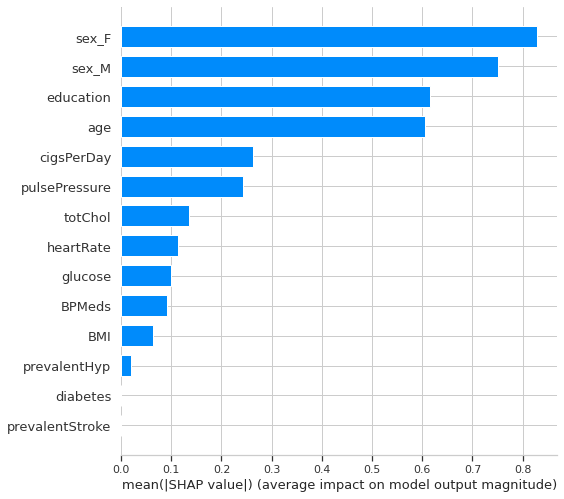

In [87]:
# SHAP Summary Plot
shap.summary_plot(shap_values, shap_df, plot_type = 'bar')

### This plot gives us an insight into the importance of the features. According to the plot we can see that pretty much all the features are influencing the dependent variable. Among the three factors, gender influences the most, followed by education, and finally the age of the person. 
